# k_nearest_neibhours with python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline
import seaborn as sns

UsageError: Line magic function `%matplotlib.inline` not found.


In [1]:
df=pd.read_csv("Classified Data")

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# standarizing the variables

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler=StandardScaler()

In [5]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [6]:
scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [8]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

<IPython.core.display.Javascript object>

In [10]:
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# train test split

In [11]:
from sklearn .model_selection import train_test_split


In [12]:
x_train,x_test,Y_train,Y_test=train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.3)

# using KNN algorithm

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred=knn.predict(x_test)

# predictions and evaluations

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))

[[138  12]
 [ 20 130]]


In [28]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       150
           1       0.92      0.87      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# how to choose k value

In [37]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,Y_train)
    pred_1=knn.predict(x_test)
    error_rate.append(np.mean(pred_1!=Y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'error rate')

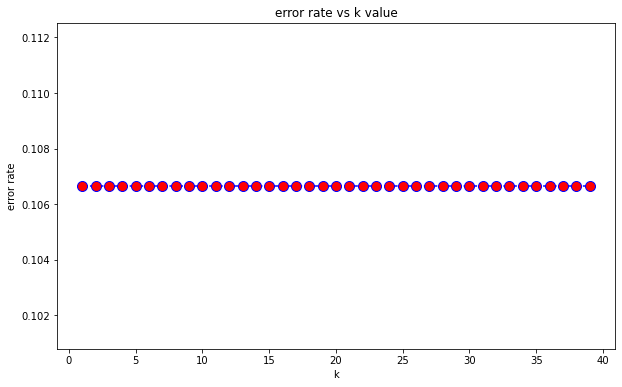

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor='red',markersize=10)
plt.title("error rate vs k value")
plt.xlabel("k")
plt.ylabel("error rate")